# Theoretical Background

**Poisson's Equation**

The potential within a region of space is described by Poisson's equation, which is known as (Griffiths, 2005:83):

$$\nabla^{2} V = \frac{\rho}{\epsilon_{0}}$$

Where:

$V$: The potential. $[V \text{ (Volt)}]$

$\rho$: Volume charge density. $[\frac{C}{m^{3}} \text{ (Coulomb per unit volume)}]$

$\epsilon_{0} = 8.85 \times 10^{-12}$ $[\frac{C}{N.m^2}]$


**Solving Poisson's Equation Numerically**


For a two-dimensional region, Poisson's equation is:

$$\nabla^{2} V = \frac{\partial^{2} V}{\partial x^{2}} + \frac{\partial^{2} V}{\partial y^{2}} = -\frac{\rho}{\epsilon_{0}}$$

Discretising the region as a grid of equally sized squares, let $(x_{i}, y_{j})$ represent the centre coordinates of the square in the $i^{th}$ row and the $y^{th}$ column.

The $2^{nd}$-derivates within Poisson's equation can be solved numerically with the central-difference formula:

$$\frac{\partial^{2}V}{\partial x^{2}} \approx \frac{V(x_{i+1}, y_{j})-2.V(x_{i}, y_{j})+V(x_{i-1}, y_{j})}{\Delta x^{2}}$$

$\&$

$$\frac{\partial^{2}V}{\partial y^{2}} \approx \frac{V(x_{i}, y_{j+1})-2.V(x_{i}, y_{j})+V(x_{i}, y_{j-1})}{\Delta y^{2}}$$

$$\therefore \nabla^{2}V \approx \frac{V(x_{i+1})-2.V(x)+V(x_{i-1})}{\Delta x^{2}} + \frac{V(y_{j+1})-2.V(y)+V(y_{j-1})}{\Delta y^{2}} = -\frac{\rho}{\epsilon_{0}}$$

Taking the space between each square to be equal to one unit of distance ($\Delta x = \Delta y = 1$), it can be said that:

$$V(x_{i+1}, y_{j})-2.V(x_{i}, y_{j})+V(x_{i-1}, y_{j}) + V(x_{i}, y_{j+1})-2.V(x_{i}, y_{j})+V(x_{i}, y_{j-1}) = -\frac{\rho}{\epsilon_{0}}$$

$$\therefore 4.V(x_{i}, y_{j}) = V(x_{i+1}, y_{j}) + V(x_{i-1}, y_{j}) + V(x_{i}, y_{j+1}) + V(x_{i}, y_{j-1}) + \frac{\rho}{\epsilon_{0}}$$

$$\therefore V(x_{i}, y_{j}) \approx \frac{1}{4}.[V(x_{i+1}, y_{j}) + V(x_{i-1}, y_{j}) + V(x_{i}, y_{j+1}) + V(x_{i}, y_{j-1}) + \frac{\rho}{\epsilon_{0}}]$$

The way of solving the potential $V$ at point $(x_{i}, y_{j})$ is an example of a "relaxation method", since it depends on the average of the potential $V$ at the points surrounding $(x_{i}, y_{j})$ (Ayars, 2013:142).


**The relaxation method to solve $V(x_{i}, y_{j})$**


The method involves the following steps (Ayars, 2013:143):

- Populate the grid with an initial guess for $V$ at each point (in this case zero is used for every point).
- Iterate through the grid and solve $V(x_{i}, y_{j})$.


The **over-relaxation method** simply involves repeating this process, recalculating the values of $V(x_{i}, y_{j})$ in the following way (Ayars, 2013:143):

$$V_{new}(x_{i}, y_{j}) = \alpha.\Delta V + V_{old}(x_{i}, y_{j})$$

Where:
$1 \leq \alpha \leq 2:$ Over-relaxation factor.

# Import Libraries

In [1]:
# --------------------
# Scientific computing
# --------------------

import numpy as np # For scientific computing
import scipy.constants as sci

# ------------------
# Data Visualisation
# ------------------

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

newparams = {'figure.figsize': (16, 6), 'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

# Pseudo-Code / Planning

The program would need functions to define the coordinates, charge distribution and potential of the region (the grid) for both the electric monopole and -dipole. This can be done with 2D numpy arrays.


Therefore define:


$monopole(r, res, q)$: For the electric monopole charge distribution, which creates a grid with resolution (res $\times$ res), coordinates $(x,y)$ based on the given radius $r$ and with a charge $q$ at the centre of the grid.


Similarly define:


$dipole(r, res, q, x_q1, y_q1, x_q2, y_q2)$: For the electric dipole charge distribution, also with resolution (res $\times$ res), coordinates $(x,y)$ based on the given radius $r$, but differently in this case with charge $+q$ at coordinates $(x_{q1}, y_{q1})$ and charge $-q$ at $(x_{q2}, y_{q2})$.

Let both of these functions return the following 2D numpy arrays:

The grid of coordinates as $grid$.

The charge distribution as $rho$.

The initial potential as $V$.

The program would also need a function to solve $V(x_{i}, y_{j})$ with Poisson's equation over the grid.


Therefore define:


$solve{V}(r, res, grid, rho, V)$: Which updates the values of $V(x_{i}, y_{j})$ for the given region with coordinates $grid$, circular boundary with radius $r$, charge distribution $rho$ and previous potential values $V$.

Apply the over-relaxation method as planned, by simply repeatedly calling $solveV$.

Finally, simply display the values of $V(x_{i}, y_{j})$ in terms of the coordinates $(x_{i}, y_{j})$ as a $3D$ plot.

# Define Functions

## Electric Monopole Charge Distribution

In [2]:
def monopole(r, res, q):
    '''
    For an electric monopole: creates a two-dimensional grid representing the charge density
    and the initial guess for the electric potential respectively.
    
    Input:
    r (float): Radius of the circular region.
    res (int): Amount of squares on each row and column of the grid.
    A higher value, results in a higher resolution.
    q (float): Charge of the monopole at the centre of the grid.
    
    Output:
    grid (numpy meshgrid): Coordinates of the grid.
    rho (2D numpy array): Charge distribution as a grid.
    V (2D numpy array): Electric potential as a grid.
    '''
    
    # -------------------
    # Set coordinates
    # -------------------
    
    x_min = -r
    x_max = r
    y_min = -r
    y_max = r
    
    x = np.linspace(x_min, x_max, res)
    y = np.linspace(y_max, y_min, res)
    grid = [y, x]
    
    # -------------------
    # Set charge density
    # -------------------
    
    # Create an empty grid representing the charge distribution.
    rho = np.zeros([res, res])
    
    # Place the monopole charge at the centre of the grid.
    x_mid = int(res/2)
    y_mid = int(res/2)
    rho[y_mid][x_mid] = q
    
    # -----------------------------
    # Initialise Electric Potential
    # -----------------------------
    
    V = np.zeros([res, res])
    
    return res, grid, rho, V

## Electric Dipole Charge Distribution

In [3]:
def dipole(r, res, q, x_q1, y_q1, x_q2, y_q2):
    '''
    For an electric dipole: creates a two-dimensional grid representing the charge density
    and the initial guess for the electric potential respectively.
    
    Input:
    r (float): Radius of the circular region within the grid.
    res (int): Amount of squares on each row and column of the grid.
    A higher value, results in a higher resolution.
    q (float): Charge of the monopole at the centre of the grid.
    x_q1 (float): x-Coordinate of the + charge of the electric dipole.
    y_q1 (float): y-Coordinate of the + charge of the electric dipole.
    x_q2 (float): x-Coordinate of the - charge of the electric dipole.
    y_q2 (float): y-Coordinate of the - charge of the electric dipole.
    
    Output:
    grid (numpy meshgrid): Coordinates of the grid.
    rho (2D numpy array): Charge distribution as a grid.
    V (2D numpy array): Electric potential as a grid.
    '''
    
    # -------------------
    # Set coordinates
    # -------------------
    
    x_min = -r
    x_max = r
    y_min = -r
    y_max = r
    
    x = np.linspace(x_min, x_max, res)
    y = np.linspace(y_max, y_min, res)
    grid = [y, x]
    
    # Get nearest index from the grid of coordinates which correspond with the electric dipole's coordinates
    
    def nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx;
    
    i_q1 = nearest(y, y_q1)
    j_q1 = nearest(x, x_q1)
    
    i_q2 = nearest(y, y_q2)
    j_q2 = nearest(x, x_q2)
    
    # -------------------
    # Set charge density
    # -------------------
    
    # Create an empty grid representing the charge distribution.
    rho = np.zeros([res, res])
    
    # Place the + charge of the dipole a quarter of the radius away on the y-axis from the grid's centre.
    rho[j_q1][i_q1] = q
    
    # Place the - charge of the dipole a quarter of the radius away on the y-axis from the grid's centre.
    rho[j_q2][i_q2] = -q
    
    # -----------------------------
    # Initialise Electric Potential
    # -----------------------------
    
    V = np.zeros([res, res])
    
    return res, grid, rho, V

## Method to Solve $V(x_{i}, y_{j})$

In [4]:
def solve_V(r, res, grid, rho, V):
    '''
    Solves Poisson's equation numerically over the specified grid with circular boundary conditions.
    
    Input:
    r (float): Radius of the circular region within the grid.
    res (int): Amount of squares on each row and column of the grid.
    grid (numpy meshgrid): Coordinates of the grid.
    rho (2D numpy array): Charge distribution as a grid.
    
    Output:
    V (2D numpy array): Electric potential as a grid.
    '''
    
    # Solve Poisson's Equation Numerically
    for i in range(1, res-1):
        for j in range(1, res-1):
            y = grid[0][i]
            x = grid[1][j]
            if(x**2 + y**2 <= r**2):
                V[i][j] =  0.25 * (V[i+1][j] + V[i-1][j] + V[i][j+1] + V[i][j-1]
                                   + rho[i][j]/sci.epsilon_0)
    return V

## Plot Potential

In [5]:
def plot_V(x, y, V, cmap):
    '''
    Creates a 3D plot of the potential as a function of the (x,y) coordinates on the grid.
    
    Input:
    x (1D numpy array): x-coordinates.
    y (1D numpy array): y-coordinates.
    V (1D numpy array): Potential values corresponding to the coordinates (x,y)
    cmap (string): Color map the plot uses.
    
    '''

    # Create figure
    fig = plt.figure(figsize = (20, 16))

    # Set projection to 3D
    ax = fig.gca(projection='3d')
    
    # Create Meshgrid
    mg = np.meshgrid(x, y)

    # Plot surface
    surf = ax.plot_surface(mg[0], mg[1], V, vmin = np.min(V), vmax = np.max(V), cmap = cmap, linewidth =0.1, antialiased = True)
    
    # Set title and axes labels
    ax.set_xlabel('x (PU)', fontsize = 20, labelpad = 20)
    ax.set_ylabel('y (PU)', fontsize = 20, labelpad = 20)
    ax.set_zlabel('Potential [V]', fontsize = 20, labelpad = 25)
    ax.tick_params(axis='both', labelsize = 15)
    
    # Set Colorbar
    fig.colorbar(surf, shrink = 0.5, aspect = 5)
    
    return None

# Results

## Electric Monopole

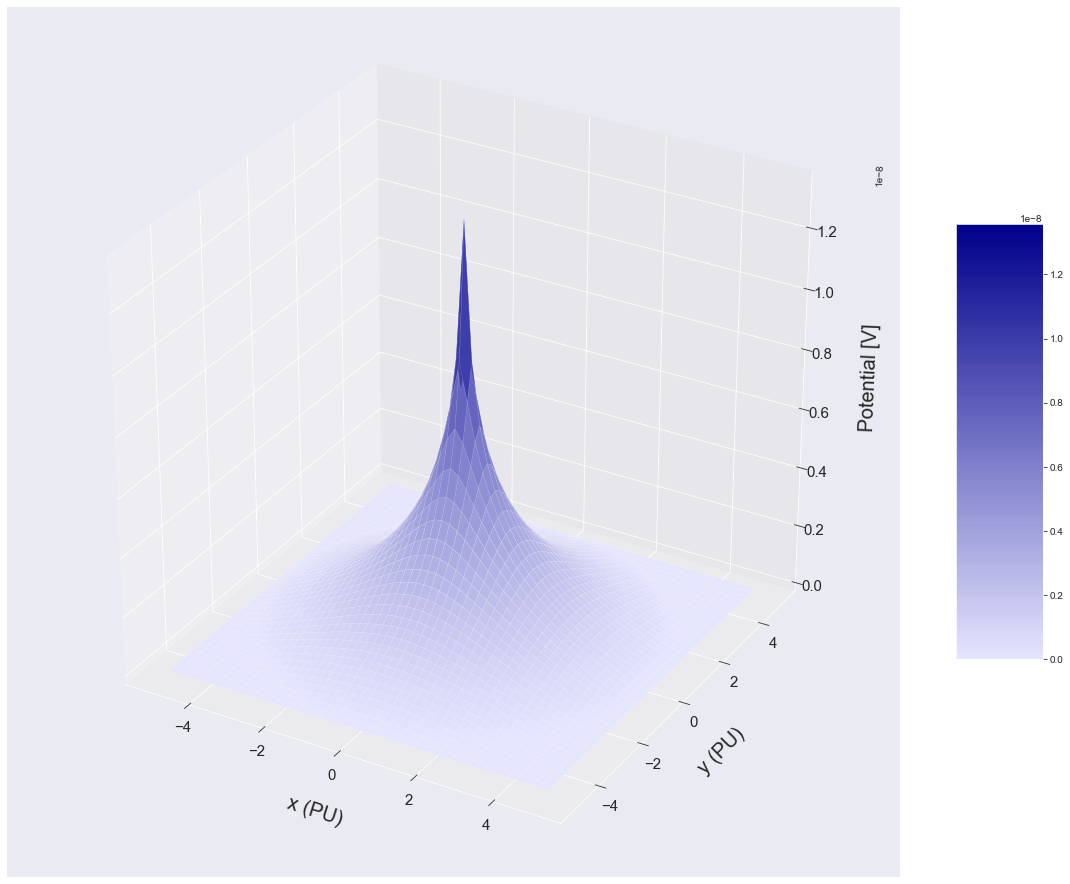

In [6]:
# -------------
# Set variables
# -------------
r = 5 # Radius of the circular boundary.
res = 50 # Resolution / amount of squares in each row & column.
q = sci.e # Charge of the monopole.

# -----------------------
# Initialise the results
# -----------------------
res, grid, rho, V = monopole(r, res, q)

# --------------------------------
# Apply the relaxation method
# --------------------------------

V_new = solve_V(r, res, grid, rho, V)

# --------------------------------
# Apply the over-relaxation method
# --------------------------------

alpha = 2 # Over-relaxtion factor
tol = 0.001 # Tolerance
N = 500 # Maximum amount of times the over-relaxation method may be applied

flag = True
counter = 0

while(flag is True):
    counter = counter + 1
    V_old = V_new
    temp = solve_V(r, res, grid, rho, V_old)
    dV = np.amax(np.abs(temp - V_old))
    if(dV > tol or counter > N):
        flag = False
    else:
        V_new = alpha*dV + V_old
        
x = grid[0]
y = grid[1]

cmap = sns.light_palette("darkblue", as_cmap=True)
plot_V(x, y, V_new, cmap)

## Electric Dipole

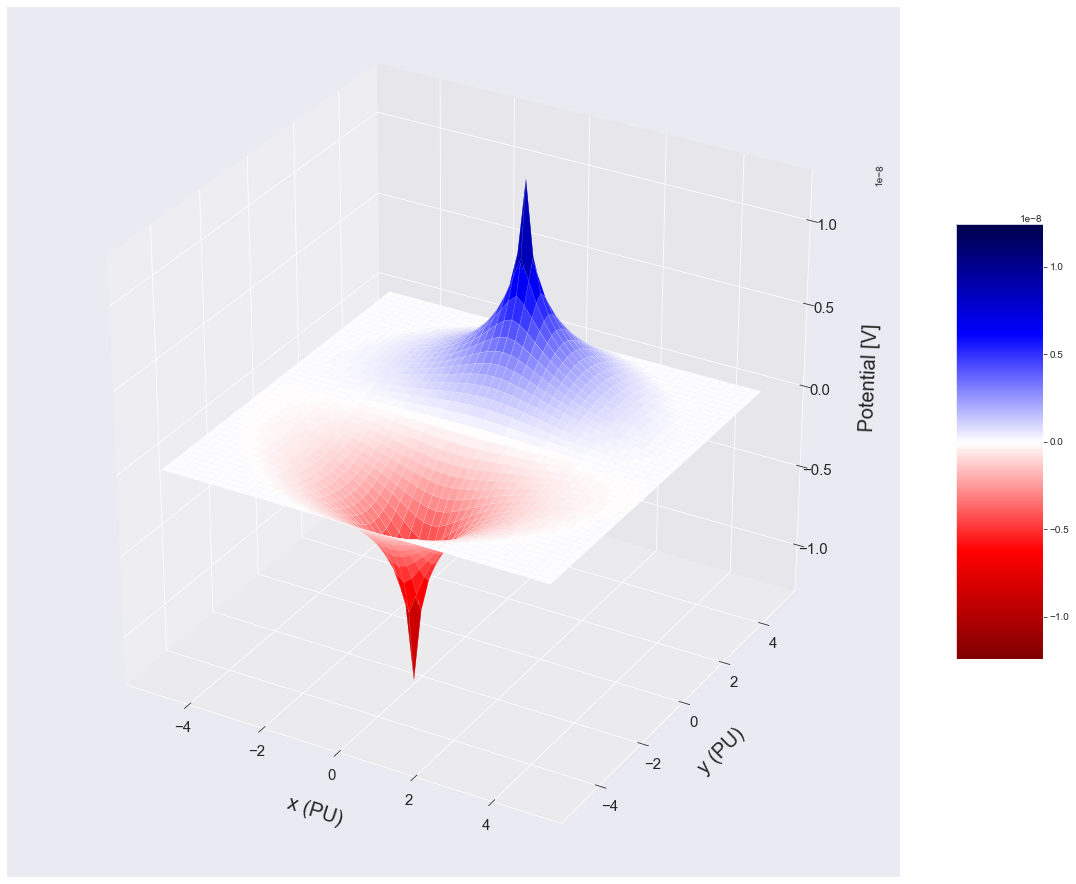

In [7]:
# -------------
# Set variables
# -------------
r = 5 # Radius of the circular boundary.
res = 50 # Resolution / amount of squares in each row & column.
q = sci.e # Lets the dipole have charges +q and -q.

# Coordinates of the +q charge.
x_q1 = 2.5 
y_q1 = 0

# Coordinates of the -q charge.
x_q2 = -2.5
y_q2 = 0

# -----------------------
# Initialise the results
# -----------------------
res, grid, rho, V = dipole(r, res, q, x_q1, y_q1, x_q2, y_q2)

# --------------------------------
# Apply the relaxation method
# --------------------------------

V_new = solve_V(r, res, grid, rho, V)

# --------------------------------
# Apply the over-relaxation method
# --------------------------------

alpha = 2 # Over-relaxtion factor
tol = 0.001 # Tolerance
N = 500 # Maximum amount of times the over-relaxation method may be applied

flag = True
counter = 0

while(flag is True):
    counter = counter + 1
    V_old = V_new
    temp = solve_V(r, res, grid, rho, V_old)
    dV = np.amax(np.abs(temp - V_old))
    if(dV > tol or counter > N):
        flag = False
    else:
        V_new = alpha*dV + V_old
        
x = grid[0]
y = grid[1]

cmap = cm.seismic_r
plot_V(x, y, V_new, cmap)

# References

- Ayars, E., 2013. Computational Physics With Python. California State University, Chico.-2018.

- Griffiths, D.J., 2005. Introduction to electrodynamics (3rd Edition).